In [ ]:
%%capture
# Install the autograder to check your answers as you go along
import sys
!{sys.executable} -m pip install otter-grader
# Initialize Otter
import otter
grader = otter.Notebook("HW4.ipynb")
import warnings
warnings.filterwarnings("ignore")

# Homework #4   
**Due Friday Dec. 1st @ 11:59 pm**

**Objective:** This assignment synthesizes many data analysis and plotting skills you have learned this quarter including reading text files, Numpy, Pandas, SciPy, and plotting.


## **Instructions:**
### Accessing Class Code
1. Clone this repository into your own JupyterHub by running this command in your home directory:
```git clone your_SSH_URL```

2. Once you have cloned the repository, go into your directory and set your branch to "main" (See the GitHub cheatsheet for help on this). You will not need to reset your remote origin, as you have already directly cloned from your own version of the repository.

3. There should now be a "homework_4" directory in the home directory of your JupyterHub. In terminal, change directories into "homework_4". Next, click on the the "homework_4" icon on the filepath hierarchy in the left panel of JupyterHub. If you don't see it, make sure you're in the home folder by clicking the folder icon under the search bar. 

4. Double click the "HW4.ipynb" to open it in a new tab and begin working on the assignment. Read the instructions carefully, and make sure to write your answers in the specified cells. Typically, you will see a "..." in the places you need to fill in. Make sure to use the variable names provided in the starter code. See the "Working in your Notebook" section below for an example. There are some autograder tests embedded in the notebook, but there are also some hidden tests that will be graded after submission.

5. Edit the README file and write your name and UW NetID. Include a paragraph on some advantages and disadvantages of smoothing data by linear regression, interpolation, or rolling means (4-5 sentences. Review the week 8-9 pre-lectures for review on these methods. (5 points)

6. As you continue to answer the homework questions and make edits to your code, make sure to regularly update your GitHub repository as well via git add, commit, and push (steps 15, 16, 19 in 0b). A good rule of thumb would be to run these git steps anytime you make an addition or change that you don't want to accidentally lose. Generally, you can push once a day to maintain good version control practices. <br>
As a note, make sure that your git commands are running without errors before you refresh your GitHub and check your changes. If you are not seeing the updated changes you created in your local JupyterHub directory, check where your status is by this command: <br>
``` git status```

Then, you can see if you made an error with your git add, commit, or push commands. 

**Sometimes, our JupyterHub server has trouble remembering the file permissions for our SSH keys. If you get a file permission error with your private ssh key, run this line of code:**
```chmod 400 ~/.ssh/id_ed25519``` 
<br>

This will change your file permission to the proper permissions that SSH requires.
    
### Submitting to GradeScope

7. Go to the class Gradescope dashboard and submit your personal GitHub repository link to the Homework 2 assignment. Make sure your GitHub is synchronized with Gradescope to access both your public _and_ private repositories. If prompted, log in to GitHub.

8. Run the autograder to check if your code runs and if you passed the initial unit tests. You should be able to run the autograder as many times as you want before submitting. Again, double check that your final answers are stored in the provided variable names given in the starter code!

13. Once the autograder has finished running, check that you have submitted the assignment. If you make any more changes to your code after submitting to Gradescope, make sure to push your changes to GitHub and resubmit the assignment on Gradescope. You can submit as many times as you want as there is no maximum submission attempts, but be sure to have your final submission in before the deadline.

### Working in your Notebook
   To help you start thinking about how to write meaningful and concise variable names, we have provided variable names in most of your questions. 
    Note that there is an ellipsis (the "...") after each of the variable names. These are the sections you are expected to fill in. Please use the provided variable names (ie "pelagic" and "coastal" in the above example) to report your final answer back in. This will ensure that the autograder on Gradescope runs properly. <br>
    <br>Make sure that you are adding comments and your outside references as you go along! Part of your grade will include using best coding practices in your homework assignments. 

### Honor Code

- Complete the assignment by writing and executing text and code cells as specified. For this assignment, do not use any features of Python that have not yet been discussed in the lessons or class sessions.

- Please keep in mind our late work and dropped homework grading policy. Review the syllabus for details.

- You can acknowledge and describe any assistance you've received on this assignment in the specified cell of this HW3 notebook, whether that was from an instructor, classmate (either directly or on Ed Discussion), and/or online resources other than official Python documentation websites like docs.python.org or numpy.org. Alternatively, if you prefer, you may acknowledge assistance at the relevant point(s) in your code using a Python comment (#). Don't forget that you can receive extra credit from answering at least one question on Ed Discussion!

## Required Plot Elements:
1. x and y axis labels with units
2. a meaningful, descriptive title
3. font size above 12

# Grade Breakdown
- Question 1: 85 points
    - Part 1: 20 points
    - Part 2: 10 points
    - Part 3: 15 points
    - Part 4: 20 points
    - Part 5: 20 points
- Best coding practices: 10 points
- README: 5 points

**Total: 100 points**

- Extra Credit: 5 points for answering a question on Ed Discussion

# Q1: Pakistan Sea Level Trends (85 points)


Threats from climate change often impact devloping countries most harshly. This is particularly true for nations at risk from sea level rise. Much of Pakistan is very low elevation, and the coastal city of Karachi is on average only 8 meters above sea level. Through a combination of sea level rise and river delta subsidence, some researchers estimate that Karachi could be underwater in the next several decades (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7517073/).

In this exercise, we will analyze sea level data curated by the Permanent Service for Mean Sea Level (https://psmsl.org/data/obtaining/stations/204.php). Data was collected intermittently from Karachi during 1910-2016 (graph from PSMSL below). We will explore how to best visualize this data and interpolate missing values. Finally, we will calculate the rate of sea level rise at Karachi.

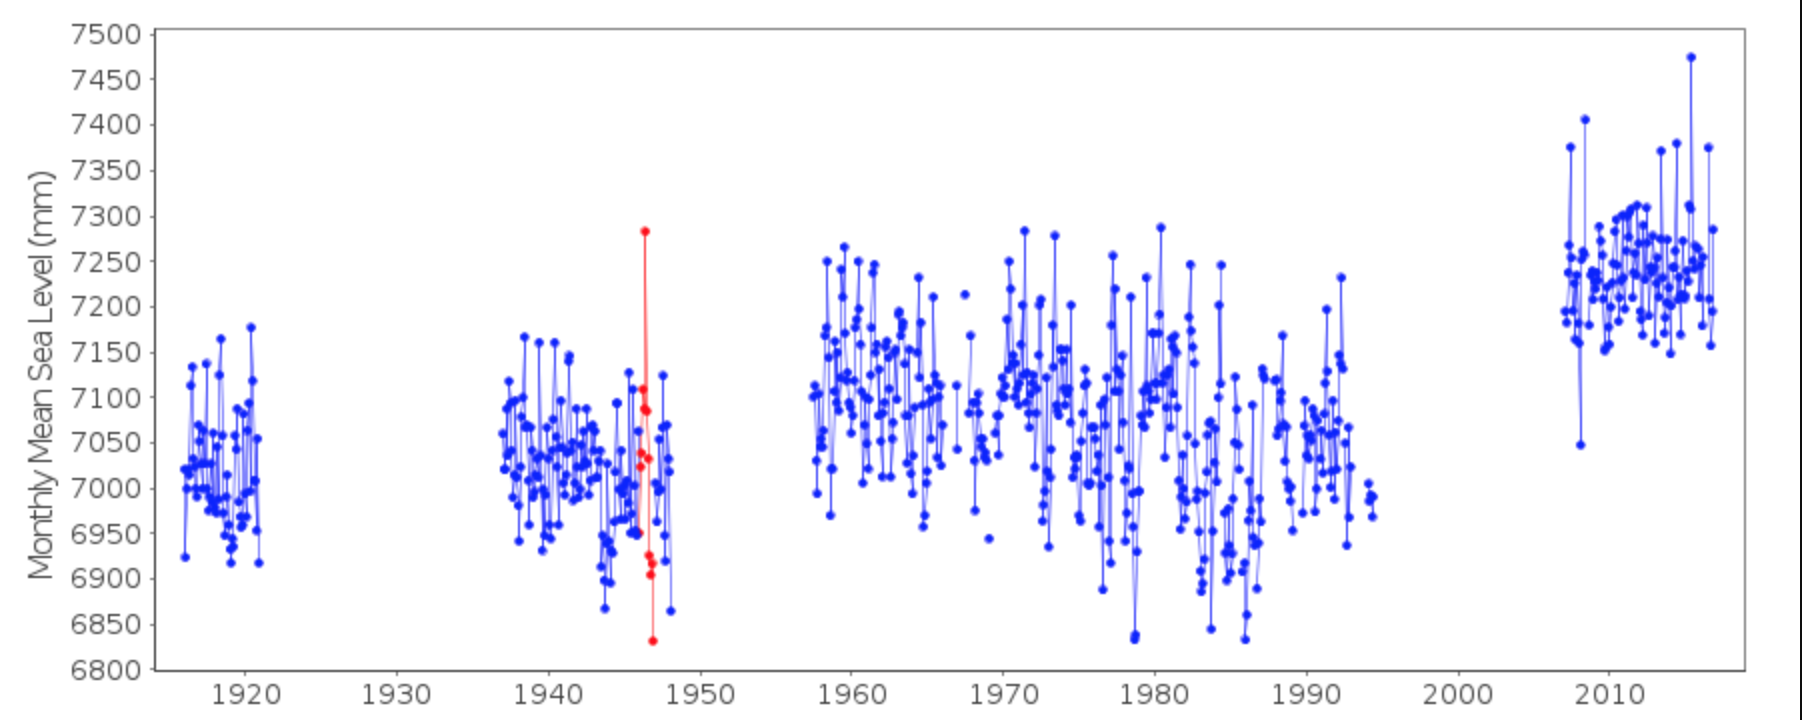

## Part 1: Reading in initial data and cleaning (20 points)
1) Use the `readline()` function and a for loop, find out how many lines of header are in the "Pakistan_sea_level_psmsl.txt" file and store this number in the `header_lines` variable. Read the information in the header. In this data file, missing sea level data points are filled with a placeholder "masking" value. (5 points)
>1) What is the masking value for missing data in this dataset? Answer this question in the markdown cell below the solution cell.

2) Use numpy `genfromtext()` to read each column of your text file into a Numpy array as floats and store the array in the `sea_level` variable.(_HINT: Remember that indexing starts with 0 in Python!_). Store the columns as individual 1-D arrays (excluding "number of missing days") in the provided answer variables, `year_month`, `depth_mm`, `data_flag`. (5 points)
>1) What is the delimiter type for this text file? Answer this question in the markdown cell below the solution cell.

3) Using the numpy `where()` function and its first positional argument ([Documentation](https://numpy.org/doc/stable/reference/generated/numpy.where.html)), find the indices of the masked depth values that represent missing values in your Numpy array and store the resulting array in `mask_inds`. Using `mask_inds`, replace the masking values in `depth_mm` with `np.nan` values. (5 points)

4) PSMSL also flags data that is likely erroneous. In this data, a data quality flag value of 11 represents bad data. We will also replace these suspicious values with `np.nan` values to ignore them. (5 points)

  >a) Find the indices of bad data quality values in `data_flag` by numpy `where()` and store in `bad_inds`.

  >b) Save the corresponding "year" and "depth_mm" values of bad data in a separate arrays, `bad_years` and `bad_depths` respectively. 
  
  >c) Replace bad depth values in `depth_mm` with `np.nan` values.

In [ ]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate 
from scipy import stats
print("Part 1")
# store filepath to data here
filepath = ...
# open file path here
fileobj = ...

# Find how many lines of headers with readline()
...
# store number of header_lines here
header_lines = ...

print("Part 2")
#Make np array of data using genfromtext here
sea_level = ...

#display
...

# store decimal years 1D array here
year_month = ...
# store depth 1D array here
depth_mm = ...
# store data flag 1D array here
data_flag = ...

print("Part 3")
# store indices where depth_mm is equal to missing data masked value here
mask_inds = ...
# replace missing data mask values in depth_mm with Nans
...

print("Part 4")
# store indices of bad data values here
bad_inds = ...
# store years of bad data here
badyears = ...
# store depth values of bad data here
baddepths = ...
# replace bad data values in depth_mm with Nans
...

_Type your answers to the question from Part 1 here_ <br>
1A. 

2A. 

In [ ]:
grader.check("Question 1, Part 1")

## Part 2: Plotting (10 points)
5) Make a matplotlib figure with using plt.subplots(). *Make sure you include all required elements including proper labels, colors, and legends.* 
  
>a) Plot your depth timeseries (x = `year_month`, y = `depth_mm`). Add a marker.

>b) Plot the bad depths you removed from your original arrays on the top subplot in a different color.

>c) Add a legend.

In [ ]:
print("Part 5")
# create plot using subplots
...
# plot year vs. depth
...
# plot bad years vs. bad depths
...
# don't forget your required plot elements!
...

## Part 3: Interpolation (15 points)
6) Turn your Numpy arrays into a DataFrame with three columns. (5 points) 

>a) Store your `year_month`, `depth_mm`, and `data_flag` arrays in a list and transpose the list of arrays. Store this in the `list_data` variable.

>b) Create a pandas dataframe and set it as the variable `df`. Set the named argument, data=list_data, in the pandas `DataFrame()`.

>c) Set your column names to 'Year', 'Depth', and 'Flag' using the "columns" argument in the `DataFrame()` function. 

>d) Display `df`. 

7) There are large gaps in this dataset. Use Scipy's interp1d() to linearly interpolate the missing depth values. (5 points)

>a) Using the numpy `where()` function in the same was at Part 1.3, find the indices of depth values that are **_not_** `np.nan` using the df["Depth"] column. (**HINT: Use the pandas [notnull()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notnull.html) function**). 
Store these indices in the `depth_inds` variable. 

>b) Build and store your interpolation function in `func`. Make sure to subset `df` by `depth_inds` when 
setting x as the 'Year' column of `df` and y as the 'Depth' column. Set the "kind" argument to "linear".

>c) Apply your interpolation function to all years in `df` to find interpolated depths. Store your interpolated depth values in a new column called "Depth_interp" in `df`.

>d) Display `df`.

8) Plotting the interpolated data and compare against original data. (5 points)

>a) Make a matplotlib figure with two subplots using the 'subplots()' function (set nrows = 2). Set the figsize to (10,6). **Make sure you include all required elements including proper labels, colors, and legends.**

>b) Copy and paste your plot from Part 2) onto the **top** subplot. Include the depth time series and bad depth values, and make sure to plot on the correct axes object.

>c) Plot the "Depth_interp" values on your bottom subplot as a different color from your "Depth" data. Add a label and make a legend for the **bottom** subplot.

>d) Do you think the interpolation accurately describes trends in missing depth data? Why or why not? Answer this question in the markdown cell below the code solution cell.

In [ ]:
## Part 6
print('Part 6: ')
# store arrays into list and transpose here
list_data = ...
# Make a Dataframe with list_data, and set Year, Depth, and Flag as column names
df = ...
# display your dataframe
...

print('Part 7: ')
# find the indices where df["Depth"] is not null and store here
depth_inds = ...
# linearly interpolate missing data
func = ...
# make new "Depth_interp" column in df here 
...
# display your dataframe here
...

print('Part 8: ')
# plot figure with 2 subplots below
...
# copy and paste code from part 1) into top subplot
...
# plot Year vs. Depth_interp in bottom subplot
...

_Type your answers to the question from Part 3 here_ <br>
8d. 

In [ ]:
grader.check("Question 1, Part 3")

## Part 4: Calculate Rolling Mean and Interpolate (20 points)
9) Depth data varies greatly between months, which can make it difficult to see larger scale trends. (10 points)

>a) To better visualize yearly trends, calculate the rolling yearly mean of depths using Pandas function `.rolling()` function ([Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)). _HINT: The data is in monthly resolution. How many months will you need to get the rolling yearly mean?_

>b) Store the rolling mean depth values in a new column called "yearly_height" in `df`.

>c) Copy and paste your plot from Part 8).

>d) Plot your "yearly_height" values against "Year" on the **top** subplot, overlaying the original time series data. Make this line a different color and line style, and add it to the legend in the top subplot.


10) The .rolling() function does not deal with nan values, which represents our missing and suspicious data. This results in creating larger data gaps in the calculated rolling mean depth values compared to the original data. Here, we will _interpolate and extrapolate_ the rolling mean values to resolve the data gaps. (10 points)

>a) Using the numpy `where()` function in the same was at Part 3.7, find the indices of depth values that are **_not_** `np.nan` using the df["yearly_height"] column. 
Store these indices in the `rolling_inds` variable. 

>b) Build and store your interpolation function in `func` as you did in part 3.7. Make sure to subset `df` by `rolling_inds` when 
setting x as the 'Year' column of `df` and y as the 'yearly_height' column. Set the "kind" argument to "linear" again, and also use the named argument: fill_value="extrapolate". 

>c) Store your interpolated rolling mean depth values in a new column called 'Depth_interp_roll' in `df`.

>d) Building off your plot from Part 9, plot your interpolated rolling mean depth values ('Depth_interp_roll') on your **bottom** subplot. Add it to the legend in the bottom subplot. (You do not need to copy/paste the code here, just add the line of code underneath your plotting code from Part 9).

>e) Do you think this interpolation describes the trends in missing depth data more or less accurately than your first interpolation attempt? Why or why not? Store your answer in the markdown cell below the solution cell. 

_Type your answer here, replacing this text._

In [ ]:
print('Part 9: ')
# Use pandas .rolling to get yearly averages of sea level and store in a new column called 'yearly_height'
...

print('Part 10: ')
# find the indices where df["yearly_height"] is not null and store here
rolling_inds = ...
# linearly interpolate missing data
func = ...
# make new "Depth_interp_roll" column in df here 
...
# display your df dataframe here
...

## plot figure with yearly interpolated depth and rolling interpolated depth
# copy and paste code from part 8)
...
# plot Year vs. yearly_height in top subplot
...
# plot Year vs. Depth_interp_roll in bottom subplot
...

_Type your answers to the question from Part 4 here_ <br>
10e. 


In [ ]:
grader.check("Question 1, Part 4")

## Part 5: Perform linear regression (20 points)
11) Model average sea level rise using a linear regression. (10 points)

>a) Calculate a linear regression using SciPy's `linregress()` function. Set x to "Year" and y to "Depth_interp"*. Do this in one line of code and store the output in the `slope`, `intercept`, `rvalue`, `pvalue`, and `stderr` variables. 

*It is necesarry to use interpolated depth values because linregress does not work with `np.nan` values. 

>b) Use the `slope`, `intercept`, and your "Year" column to calculate the linear regression fit (Review group_activity7 or Week 8 pre-lecture slides if you forgot the formula). Store the linear regression fit as a new column called "full_regression" in `df`. 

>c) Copy and paste your plot from Part 4.9-4.10.

>d) Plot your "full_regression" values against "Year" on the **bottom** subplot, overlaying the previous interpolated depth and rolling mean interpolation data. Make this line a different color and line style, and include the calculated rate of sea level rise (including units) in your plot legend.

>e) Does a linear model accurately describe how depth is changing over time? Why? Type your answer in the markdown cell below the coding solution cell.

12) Investigate whether sea level rise has been accelerating over time. (10 points)

>a) Make a new DataFrame including all columns from `df`, but subset the rows from the most recent instrumentation period ("Year" > 2007). Name it `recent_df`. _HINT: Use the `loc[]` function_

>b) Design another linear regression as in part 11a using the "Depth_interp" column in `recent_df`. Store the output in the `slope_new`, `intercept_new`, `rvalue_new`, `pvalue_new`, and `stderr_new` variables. 

>c) Calculate the linear regression fit with `slope_new` and `intercept_new`, but use the "Year" column from `df`, _**not `recent_df`**_. Store the recent regression fit as a new column called "recent_regression" in `df`.

>d) Building off your plot from Part 11, plot your recent regression values ('recent_regression') on your **bottom** subplot. Add it to the legend in the bottom subplot and include the calculated rate of sea level rise (including units) in your plot legend. (You do not need to copy/paste the code here, just add the line of code underneath your plotting code from Part 11).

>e) Compare the slopes of your two linear regressions. Do you think sea level rise is accelerating? Why or why not? Type your answer in the markdown cell below the coding solution cell.

_Type your answer here, replacing this text._

In [ ]:
print("Part 11: ")
# get linear regression terms
slope, intercept, rvalue, pvalue, stderr = ...
# calculate linear regression fit and store in full_regression column
...

print("Part 12: ")
# subset df past 2007 and store here
recent_df = ...
# get linear regression terms for recent data
slope_new, intercept_new, rvalue_new, pvalue_new, stderr_new = ...
# calculate linear regression fit and store in recent_regression column
...

## plot figure with regression values from full and recent datasets
# copy and paste code from part 8)
...
# plot Year vs. full_regression in bottom subplot
...
# plot Year vs. recent_regression in bottom subplot
...


_Type your answers to the question from Part 5 here_ <br>
11e. 

12e.

In [ ]:
grader.check("Question 1, Part 5")

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

After checking that all tests have passed, make sure to push your assignment to GitHub and submit to Gradescope. Do not upload the generated zip file to Gradescope unless you are having issues with GitHub and we have recommended you to do this.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(filtering=False, run_tests=True)